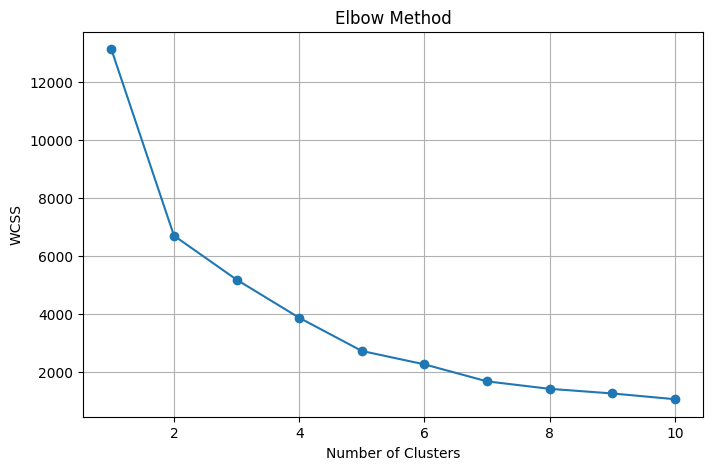

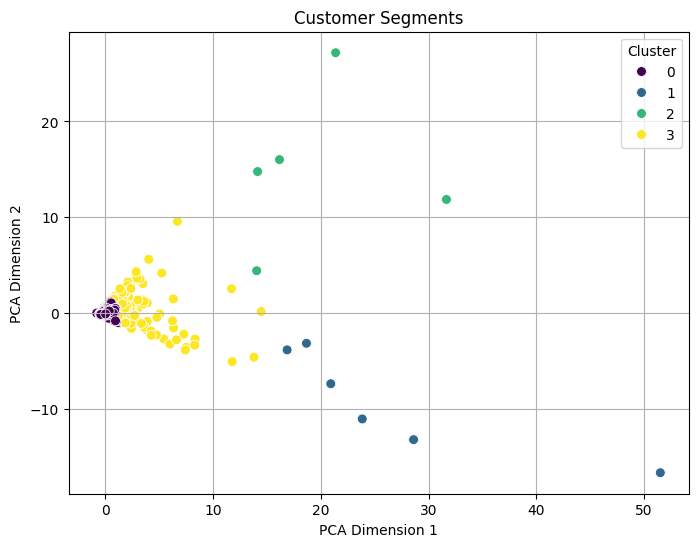

Cluster Summary:
   Cluster  TransactionCount  TotalQuantity     TotalSpent
0        0         63.908166     629.669736    1048.912821
1        1       1023.833333   87858.166667  174774.108333
2        2       5229.400000   35662.000000   63705.150000
3        3        473.461538    6849.495726   11128.342735


In [2]:
# Import necessary libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Unzip the archive and load the dataset
zip_path = '/content/archive.zip'
unzip_dir = '/content/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Load the dataset
file_path = '/content/Online Retail.xlsx'
data = pd.read_excel(file_path)

# Step 2: Data Preprocessing
# Drop rows with missing CustomerID as we need it for segmentation
data = data.dropna(subset=['CustomerID'])

# Create a new feature: TotalPrice (Quantity * UnitPrice)
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Group by CustomerID to get aggregated features
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'count',      # Number of transactions
    'Quantity': 'sum',         # Total quantity purchased
    'TotalPrice': 'sum',       # Total money spent
}).reset_index()

# Rename columns for clarity
customer_data.rename(columns={
    'InvoiceNo': 'TransactionCount',
    'Quantity': 'TotalQuantity',
    'TotalPrice': 'TotalSpent'
}, inplace=True)

# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TransactionCount', 'TotalQuantity', 'TotalSpent']])

# Step 4: Dimensionality Reduction (Optional for visualization)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(scaled_data)

# Step 5: Elbow Method to Find Optimal Clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 6: Apply K-Means Clustering
optimal_clusters = 4  # Assume the elbow method suggests 4 clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 7: Visualize the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=customer_data['Cluster'], palette='viridis', s=50)
plt.title('Customer Segments')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 8: Analyze Clusters
cluster_summary = customer_data.groupby('Cluster').agg({
    'TransactionCount': 'mean',
    'TotalQuantity': 'mean',
    'TotalSpent': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)